<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Generating_Multivariate_Random_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from my_library import *

17:02:49 Starting...
17:02:49 Installing yfinance into Google notebook...
17:02:53 Installing arch into Google notebook...
17:03:01 Initialized.


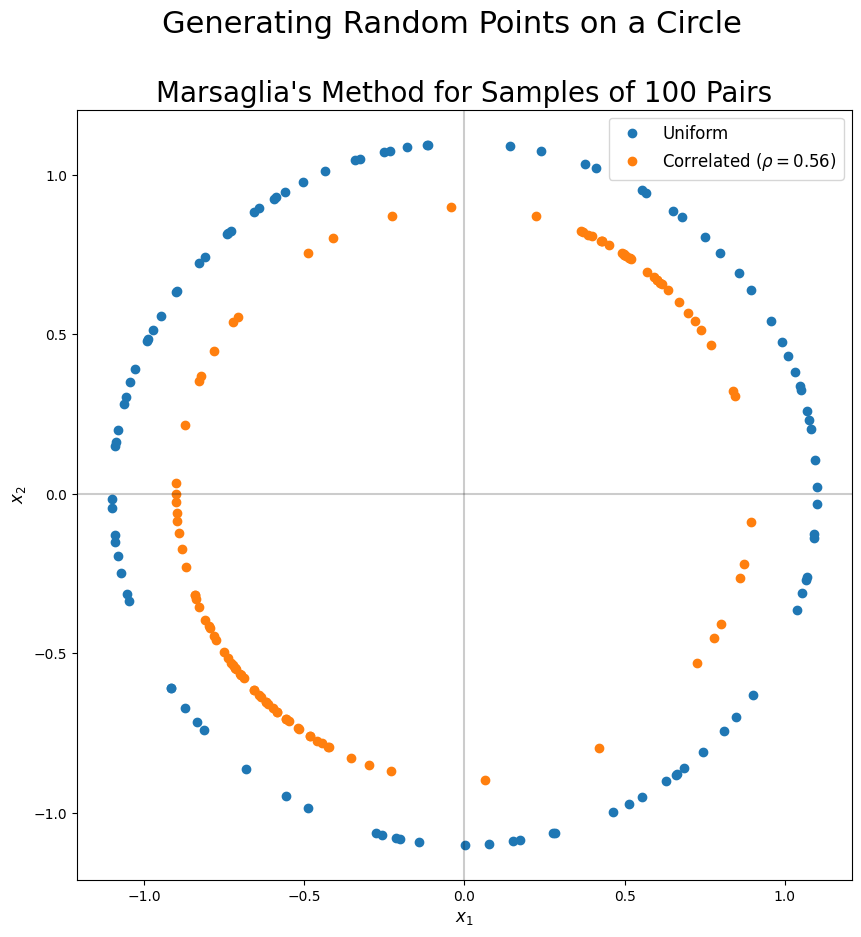

In [67]:
from scipy.stats import multivariate_normal

def gkmatrix(n=2,rho=zero,sigma=one):
    """Return a Grinold-Kahn structure covariance matrix."""

    if isinstance(n,int) and n>0:
        mat=np.zeros((n,n))

        for i in range(n):
            for j in range(n):
                mat[i,j]=one if i==j else rho

        return mat*sigma**2

    else:
        raise ValueError("n must be an integer greater than 0.")

def marsaglia(n=1,sigma=gkmatrix(2)):
    """Return random points on a N-sphere using Marsaglia's method. N is the dimension of sigma."""

    sample=multivariate_normal.rvs(mean=[zero]*sigma.shape[0],cov=sigma,size=n)
    return sample/np.linalg.norm(sample,axis=1)[:,None]

figure,plot=pl.subplots(figsize=(ten,ten))

# uniform
x,y=tuple(marsaglia(n:=100).T*1.1)
plot.plot(x,y,'o',label='Uniform')

# correlated
x,y=tuple(m:=marsaglia(100,rho:=gkmatrix(2,0.9)).T*0.9)
plot.plot(x,y,'o',label='Correlated ($\\rho = %.2f$)' % np.corrcoef(m)[0,1])

plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
plot.legend(fontsize=12)
figure.suptitle(title:='Generating Random Points on a Circle',fontsize=22)
plot.set_xlabel('$x_1$',fontsize=12)
plot.set_ylabel('$x_2$',fontsize=12)
plot.set_title(subtitle:="Marsaglia's Method for Samples of {:,d} Pairs".format(n),fontsize=20)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')

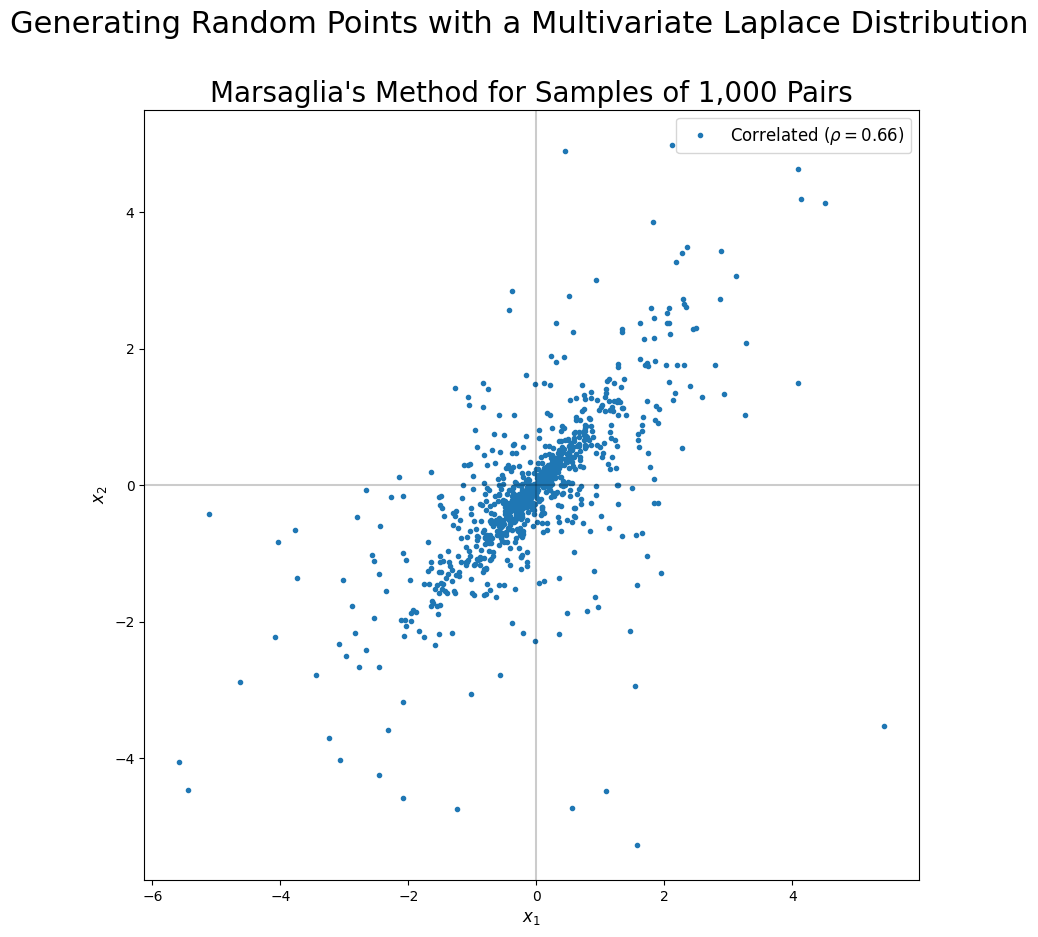

In [74]:
from scipy.stats import expon

def mvlaplace(n=1,rho=gkmatrix(2),sigma=one):
    """Generate Multivariate Laplace coordinates with a given covariance matrix."""

    sample=marsaglia(n,rho)
    return sample*expon.rvs(scale=sigma,size=n)[:,None]

figure,plot=pl.subplots(figsize=(ten,ten))

# uniform
x,y=tuple(l:=mvlaplace(n:=1000,rho).T)
plot.plot(x,y,'.',label='Correlated ($\\rho = %.2f$)' % np.corrcoef(l)[0,1])
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
plot.legend(fontsize=12)
figure.suptitle(title:='Generating Random Points with a Multivariate Laplace Distribution',fontsize=22)
plot.set_xlabel('$x_1$',fontsize=12)
plot.set_ylabel('$x_2$',fontsize=12)
plot.set_title(subtitle:="Marsaglia's Method for Samples of {:,d} Pairs".format(n),fontsize=20)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')

In [83]:
from scipy.stats import normaltest
df=pd.DataFrame({"Assets":list(range(2,1001))}).set_index("Assets")

for i in tqdm(df.index):
    sample=mvlaplace(int(annualize),rho=gkmatrix(i,0.9)).mean(axis=1)
    df.loc[i,"Mean"]=sample.mean()
    df.loc[i,"Std.Dev."]=sample.std()
    df.loc[i,"p Value"]=normaltest(sample)[1]

display(df)

  0%|          | 0/999 [00:00<?, ?it/s]

,Mean,Std.Dev.,p Value
Assets,,,
2,-0.128554,1.012944,7.930764e-08
3,0.011355,0.610687,8.392862e-05
4,0.022349,0.614288,1.731887e-12
5,0.037745,0.556127,2.202904e-08
6,-0.011454,0.496779,3.322362e-07
...,...,...,...
996,-0.001690,0.044241,1.100482e-05
997,-0.000572,0.034387,4.692037e-07
998,0.002978,0.033624,1.458665e-07


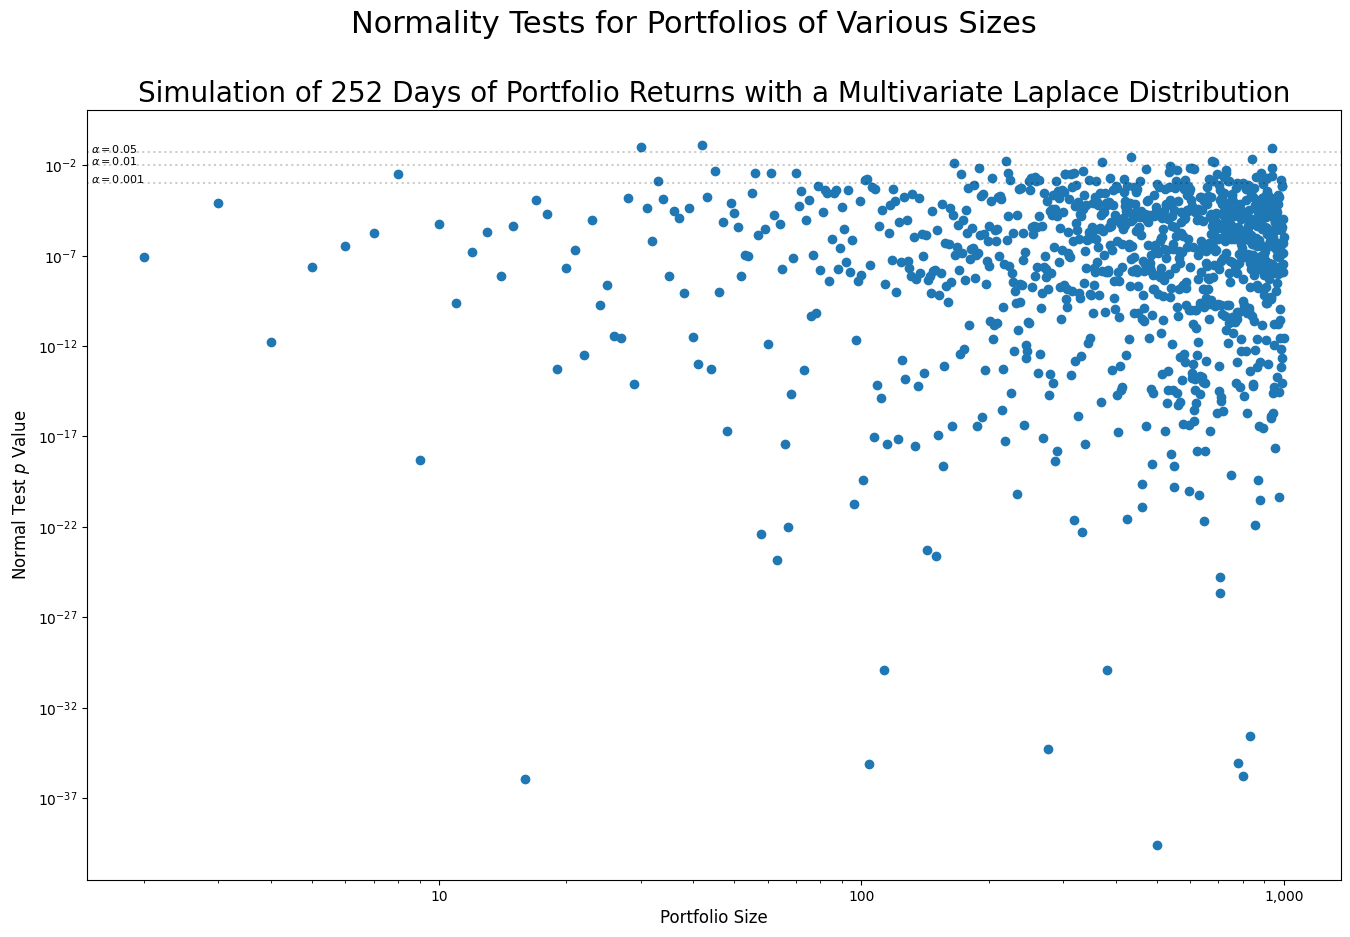

In [94]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(df.index.to_numpy(),df["p Value"].to_numpy(),'o')
plot.set_yscale('log')
plot.set_xscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))

for y in 0.05,0.01,0.001:
    plot.axhline(y,color='black',alpha=0.2,linestyle=':')
    plot.text(1.5,y,"$\\alpha = %g$" % y,fontsize=8)

plot.set_xlabel("Portfolio Size",fontsize=12)
plot.set_ylabel("Normal Test $p$ Value",fontsize=12)
figure.suptitle(title:='Normality Tests for Portfolios of Various Sizes',fontsize=22)
plot.set_title(subtitle:="Simulation of %d Days of Portfolio Returns with a Multivariate Laplace Distribution" % int(annualize),fontsize=20)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')